In [360]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import warnings
import numpy as np
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
import hashlib




# loading data

In [361]:
def input_files(file_path, delimiter=";"):
    try:
        data = pd.read_csv(file_path, delimiter=delimiter)  # Load CSV file
        print("File loaded successfully.")
        print(data.head())  # Print the first few rows
        return data  # Return the loaded data
    except Exception as e:
        print(f"Error loading file: {e}")
        return None


def input_file(file_path, delimiter=";"):
    try:
        data = pd.read_csv(file_path, delimiter=delimiter)  # Load CSV file
        print("File loaded successfully.")
        print(data.head())  # Print the first few rows
        return data  # Return the loaded data
    except Exception as e:
        print(f"Error loading file: {e}")
        return None


class InputData:
    # Load the CSV file into a Pandas DataFrame
    def input_file(self, file_path, delimiter=";"):
        try:
            data = pd.read_csv(file_path, delimiter=delimiter)  # Load CSV file
            print("File loaded successfully.")
            print(data.head())  # Print the first few rows
            return data  # Return the loaded data
        except Exception as e:
            print(f"Error loading file: {e}")
            return None

# Create an instance of the InputData class
data_loader = InputData()

# Load the first file
file_path1 = r"C:\Users\g_h36\OneDrive\سطح المكتب\HF081-N081\Well_HF081_Well_Core.csv"
Well_HF081_Well_Core = input_files(file_path1)

# Additional checks or operations after loading
if Well_HF081_Well_Core is not None:
    print("Data loaded successfully and is ready for further processing Well_HF081_Well_Core.")
else:
    print("Failed to load the data.")

file_path2 = r"C:\Users\g_h36\OneDrive\سطح المكتب\HF081-N081\Well_HF081_Well_log_1.csv"
Well_HF081_Well_log_1 = input_files(file_path2)

# Additional checks or operations after loading
if Well_HF081_Well_log_1 is not None:
    print("Data loaded successfully and is ready for further processing Well_HF081_Well_log_1.")
else:
    print("Failed to load the data.")



file_path2 = r"C:\Users\g_h36\OneDrive\سطح المكتب\HF081-N081\Well_HF081_Well_log_2.csv"
Well_HF081_Well_log_2 = input_files(file_path2)

# Additional checks or operations after loading
if Well_HF081_Well_log_2 is not None:
    print("Data loaded successfully and is ready for further processing Well_HF081_Well_log_2.")
else:
    print("Failed to load the data.")

# file_path1 = r"C:\Users\g_h36\OneDrive\سطح المكتب\HF081-N081\Well_HF081_Well_log_Result.csv"
# Well_HF081_Well_log_Result = input_files(file_path1)

# Additional checks or operations after loading
# if Well_HF081_Well_log_Result is not None:
    # print("Data loaded successfully and is ready for further processing Well_HF081_Well_log_Result.")
# else:
    # print("Failed to load the data.")


Well_HF081_Well_Core["DEPTH"] = Well_HF081_Well_Core["DEPTH"].round(2)

Well_HF081_Well_log_1["DEPTH"] = Well_HF081_Well_log_1["DEPTH"].round(2)

Well_HF081_Well_log_2["DEPTH"] = Well_HF081_Well_log_2["DEPTH"].round(2)

#Well_HF081_Well_log_Result["DEPTH"] = Well_HF081_Well_log_Result["DEPTH"].round(2)

print("Well_HF081_Well_Core\n", Well_HF081_Well_Core)
print("Well_HF081_Well_log_1\n", Well_HF081_Well_log_1)
print("Well_HF081_Well_log_2\n", Well_HF081_Well_log_2)
#print("Well_HF081_Well_log_Result\n", Well_HF081_Well_log_Result)



File loaded successfully.
  Sample No. fracture    DEPTH   So    Sw  PhiH KinfH-mD KairH-mD  PhiV  \
0         1V      NaN  1924.07    -     -     -        -        -  10.6   
1          1      NaN  1924.20  6.1  85.8   7.4       34       35     -   
2          2      NaN  1924.42  4.5    70  10.3     0.18     0.23     -   
3          3      NaN  1924.73  0.2  66.3   1.4    0.001    0.001     -   
4         2V      NaN  1925.04    -     -     -        -        -   1.9   

  KinfV-mD KairV-mD Gdensity gm/cc Description Unnamed: 13 Unnamed: 14  \
0    0.001    0.001           2.86         Dol      lt gry          hd   
1        -        -           2.87         Dol      lt gry          hd   
2        -        -           2.87         Dol      lt gry          hd   
3        -        -           2.95        Anhy          bu          hd   
4    0.001    0.001           2.94        Anhy      lt gry          hd   

   Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18 Unnamed: 19  
0   micro-fra

# Cancel a difference in depth intervals

In [362]:
# Assuming DEPTH columns are named 'DEPTH'
Well_HF081_Well_log_1.set_index('DEPTH', inplace=True)
Well_HF081_Well_log_2.set_index('DEPTH', inplace=True)
# Well_HF081_Well_log_Result.set_index('DEPTH', inplace=True)
Well_HF081_Well_Core.set_index('DEPTH', inplace=True)

# Interpolating log data to match core depths
log_interpolated = Well_HF081_Well_log_1.reindex(Well_HF081_Well_Core.index).interpolate(method='linear')

# Combine core and log data
merged_data = Well_HF081_Well_Core.join(log_interpolated, how='left')

# Save the merged data
merged_data.to_csv("merged_data.csv")

log_interpolated = Well_HF081_Well_log_2.reindex(merged_data.index).interpolate(method='linear')
merged_data1 = merged_data.join(log_interpolated, how='left', lsuffix='_core', rsuffix='_log')
merged_data1.to_csv("merged_data1.csv")

# log_interpolated = Well_HF081_Well_log_Result.reindex(merged_data1.index).interpolate(method='linear')
# merged_data2 = merged_data1.join(log_interpolated, how='left', lsuffix='_core', rsuffix='_log')
# merged_data2.to_csv("merged_data2.csv")

merged_data1.head(6)


,Sample No.,fracture,So,Sw,PhiH,KinfH-mD,KairH-mD,PhiV,KinfV-mD,KairV-mD,...,RLA3,TNPH,MRES,RXOZ,GR,RLA5,HTEN_log,SP,CTEM,SDEV
DEPTH,,,,,,,,,,,,,,,,,,,,,
1924.07,1V,NaN,-,-,-,-,-,10.6,0.001,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924.20,1,NaN,6.1,85.8,7.4,34,35,-,-,-,...,2.97548,0.265770,0.072040,3.420110,26.553410,3.122260,1311.26178,-444.57920,74.19608,2.865960
1924.42,2,NaN,4.5,70,10.3,0.18,0.23,-,-,-,...,3.23636,0.262018,0.070191,3.409054,26.430247,3.435434,1310.81740,-444.60461,74.19608,2.907518
1924.73,3,NaN,0.2,66.3,1.4,0.001,0.001,-,-,-,...,3.49724,0.258266,0.068342,3.397998,26.307084,3.748608,1310.37302,-444.63002,74.19608,2.949076
1925.04,2V,NaN,-,-,-,-,-,1.9,0.001,0.001,...,3.75812,0.254514,0.066493,3.386942,26.183921,4.061782,1309.92864,-444.65543,74.19608,2.990634
1925.10,4,NaN,11.4,59.9,3.5,0.55,0.6,-,-,-,...,4.01900,0.250762,0.064644,3.375886,26.060758,4.374956,1309.48426,-444.68084,74.19608,3.032192


# Prepare_Data


In [363]:
class PrepareData:
    def __init__(self, wdf):
        self.wdf = wdf

    def replace_invalid_values(self, invalid_values):
        """
        Replace invalid values in the dataset with NaN.
        """
        self.wdf.replace(invalid_values, np.nan, inplace=True)

    def normalize_data(self, start=None, end=None):
        """
        Normalize a range of columns to a range [0, 1].
        Accepts column indices (start, end) or names.
        """
        scaler = MinMaxScaler()
        # Get the range of columns=
        columns = self._get_columns_in_range(start, end)
        self.wdf[columns] = scaler.fit_transform(self.wdf[columns])


    def handle_missing_values(self, threshold=0.5):
        """
        Handle missing values by:
        - Dropping columns/rows with more than a specified percentage of missing values.
        - Interpolating missing data for continuous variables.
        - Using nearest-neighbor filling for remaining missing values.
        """
        # Drop columns/rows with more than threshold% missing values
        self.wdf.dropna(thresh=int(threshold * len(self.wdf.columns)), axis=1, inplace=True)
        self.wdf.dropna(thresh=int(threshold * len(self.wdf)), axis=0, inplace=True)

        # Interpolate missing data for continuous variables
        self.wdf.interpolate(method='linear', axis=0, inplace=True)

        # Fill remaining NaN values using nearest neighbor
        self.wdf.fillna(method='bfill', inplace=True)  # Backward fill
        self.wdf.fillna(method='ffill', inplace=True)  # Forward fill

    def save_cleaned_data(self, file_path):
        """
        Save the cleaned dataset to a file.
        """
        self.wdf.to_csv(file_path, index=False)

    def _get_columns_in_range(self, start, end):
        """
        Helper function to get columns in the specified range.
        """
        if isinstance(start, int):  # If start is an index
            start_col = self.wdf.columns[start]
        elif isinstance(start, str):  # If start is a name
            start_col = start
        else:
            start_col = self.wdf.columns[0]  # Default to the first column

        if isinstance(end, int):  # If end is an index
            end_col = self.wdf.columns[end]
        elif isinstance(end, str):  # If end is a name
            end_col = end
        else:
            end_col = self.wdf.columns[-1]  # Default to the last column

        # Get the range of columns
        columns = self.wdf.loc[:, start_col:end_col].columns
        return columns

    def to_excel(self, output_file_path, index):
        pass



merged_data_corr = PrepareData(merged_data1)
merged_data_corr.replace_invalid_values("-")
merged_data_corr.replace_invalid_values(-999.25000)
merged_data_corr.replace_invalid_values(-999.25)
print(merged_data_corr.wdf)
merged_data_corr.wdf.to_csv("merged_data_corr.csv")
print(merged_data_corr.wdf.columns)
print(merged_data_corr.wdf.index.name)



        Sample No. fracture    So    Sw  PhiH KinfH-mD KairH-mD  PhiV  \
DEPTH                                                                   
1924.07         1V      NaN   NaN   NaN   NaN      NaN      NaN  10.6   
1924.20          1      NaN   6.1  85.8   7.4       34       35   NaN   
1924.42          2      NaN   4.5    70  10.3     0.18     0.23   NaN   
1924.73          3      NaN   0.2  66.3   1.4    0.001    0.001   NaN   
1925.04         2V      NaN   NaN   NaN   NaN      NaN      NaN   1.9   
...            ...      ...   ...   ...   ...      ...      ...   ...   
2945.84        282      NaN  45.9  31.2  10.1     0.67     0.82   NaN   
2946.04        96V        *   NaN   NaN   NaN      NaN      NaN   8.2   
2946.10        283        *    47    33   9.9      1.6      2.1   NaN   
2946.44        284      NaN  23.3  34.6  11.4       32       37   NaN   
2946.97        285        *  32.9  22.7  11.8      1.5        2   NaN   

        KinfV-mD KairV-mD  ...       RLA3      TNP

# Outlier_Removal

In [364]:
class Outlierremoval:
    def __init__(self, dff):
        self.ddf = None
        self.dff = dff

    def remove_outliers_zscore(self, threshold=3):
        """
        Remove outliers using Z-score.
        Points with |Z| > threshold are considered outliers and are removed.DEPT
        """
        z_scores = np.abs(zscore(self.dff.select_dtypes(include=[np.number]), nan_policy='omit'))
        outliers = (z_scores > threshold).any(axis=1)
        self.ddf = self.dff[~outliers]

    def remove_outliers_iqr(self):
        """
        Remove outliers using Interquartile Range (iqr).
        Points beyond q1 - 1.5 * iqr or q3 + 1.5 * iqr are considered outliers.
        """
        q1 = self.dff.quantile(0.25)
        q3 = self.dff.quantile(0.75)
        iqr = q3 - q1

        # Determine bounds
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Remove outliers
        self.dff = self.dff[~((self.dff < lower_bound) | (self.dff > upper_bound)).any(axis=1)]

    def save_cleaned_data(self, file_path):
        """
        Save the cleaned dataset to a file.
        """
        self.dff.to_csv(file_path, index=False)

merged_data_Outlier_Removal = Outlierremoval(merged_data_corr.wdf)
merged_data_Outlier_Removal.remove_outliers_zscore()
print(merged_data_Outlier_Removal.dff)
merged_data_Outlier_Removal.dff.to_csv("merged_data_Outlier_Removal.csv")


        Sample No. fracture    So    Sw  PhiH KinfH-mD KairH-mD  PhiV  \
DEPTH                                                                   
1924.07         1V      NaN   NaN   NaN   NaN      NaN      NaN  10.6   
1924.20          1      NaN   6.1  85.8   7.4       34       35   NaN   
1924.42          2      NaN   4.5    70  10.3     0.18     0.23   NaN   
1924.73          3      NaN   0.2  66.3   1.4    0.001    0.001   NaN   
1925.04         2V      NaN   NaN   NaN   NaN      NaN      NaN   1.9   
...            ...      ...   ...   ...   ...      ...      ...   ...   
2945.84        282      NaN  45.9  31.2  10.1     0.67     0.82   NaN   
2946.04        96V        *   NaN   NaN   NaN      NaN      NaN   8.2   
2946.10        283        *    47    33   9.9      1.6      2.1   NaN   
2946.44        284      NaN  23.3  34.6  11.4       32       37   NaN   
2946.97        285        *  32.9  22.7  11.8      1.5        2   NaN   

        KinfV-mD KairV-mD  ...       RLA3      TNP

# Log_Visualizer

Extracting DataFrame from Outlierremoval...
Available columns: Index(['SAMPLE NO.', 'FRACTURE', 'SO', 'SW', 'PHIH', 'KINFH-MD', 'KAIRH-MD',
       'PHIV', 'KINFV-MD', 'KAIRV-MD', 'GDENSITY GM/CC', 'DESCRIPTION',
       'UNNAMED: 13', 'UNNAMED: 14', 'UNNAMED: 15', 'UNNAMED: 16',
       'UNNAMED: 17', 'UNNAMED: 18', 'UNNAMED: 19', 'THOR', 'SGR', 'CS', 'CGR',
       'HBHK', 'TURA', 'CHI1', 'URAN', 'CHI2', 'BS_CORE', 'POTA', 'TPRA',
       'HTEN_CORE', 'RHOZ', 'RT', 'RLA1', 'HDRA', 'BS_LOG', 'CALI', 'RLA2',
       'PEFZ', 'RLA4', 'RLA3', 'TNPH', 'MRES', 'RXOZ', 'GR', 'RLA5',
       'HTEN_LOG', 'SP', 'CTEM', 'SDEV'],
      dtype='object')
Requested log columns: ['SO', 'SGR', 'GR_CORE']


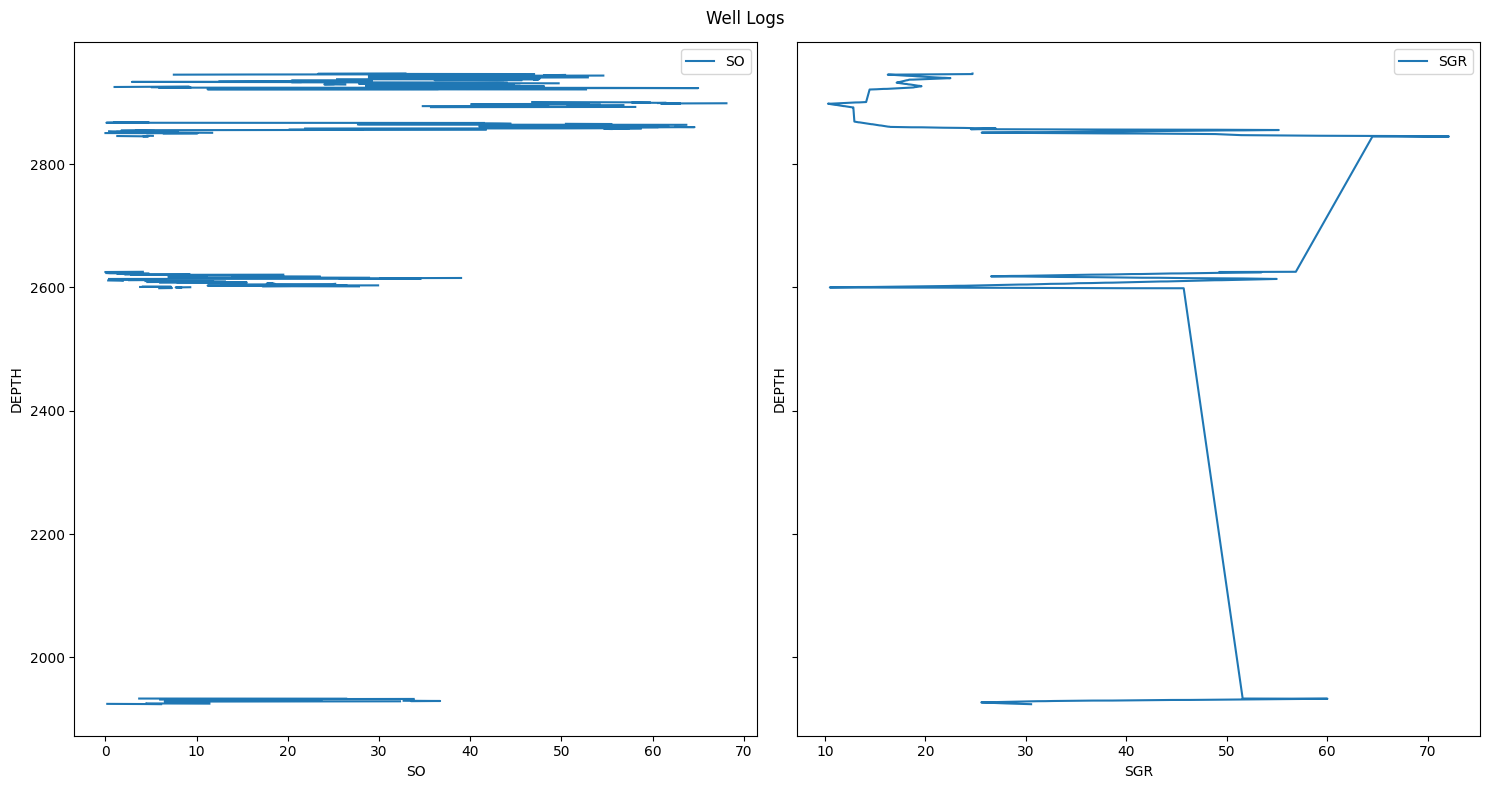

In [365]:
class LogVisualizer:
    def __init__(self, qdf):
        """
        Initialize with the DataFrame to be visualized.
        If qdf is an instance of Outlierremoval, extract its DataFrame.
        """
        if isinstance(qdf, Outlierremoval):
            if hasattr(qdf, "dff"):
                self.qdf = qdf.dff.copy()  # ✅ Ensure a copy of the DataFrame
            elif hasattr(qdf, "data"):
                self.qdf = qdf.data.copy()
            else:
                raise AttributeError("'Outlierremoval' object has no DataFrame attribute.")
        else:
            self.qdf = qdf.copy()  # ✅ Always work with a copy

        # Standardize column names
        self.qdf.columns = self.qdf.columns.str.strip().str.upper()

    def plot_logs(self, depth_col, log_cols):
        """
        Plot well logs against depth, using depth either as a column or index.
        """
        depth_col = depth_col.strip().upper()
        log_cols = [col.strip().upper() for col in log_cols]

        print("Available columns:", self.qdf.columns)
        print("Requested log columns:", log_cols)

        # 🔹 Ensure depth column is numeric
        if depth_col in self.qdf.columns:
            self.qdf.loc[:, depth_col] = pd.to_numeric(self.qdf[depth_col], errors="coerce")
            depth_values = self.qdf[depth_col]
        elif self.qdf.index.name == depth_col:
            self.qdf.index = pd.to_numeric(self.qdf.index, errors="coerce")
            depth_values = self.qdf.index
        else:
            raise ValueError(f"Depth column '{depth_col}' not found in DataFrame (as column or index).")

        # 🔹 Ensure log columns exist and are numeric
        available_log_cols = []
        for col in log_cols:
            if col in self.qdf.columns:
                self.qdf.loc[:, col] = pd.to_numeric(self.qdf[col], errors="coerce")  # ✅ FIXED
                available_log_cols.append(col)

        if not available_log_cols:
            raise ValueError("None of the specified log columns are found in the DataFrame.")

        # 🔹 Plot well logs
        ncols = len(available_log_cols)
        fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(15, 8), sharey=True, squeeze=False)

        fig.suptitle("Well Logs")

        for i, col in enumerate(available_log_cols):
            ax = axes[0][i] if ncols > 1 else axes[0, 0]
            ax.plot(self.qdf[col], depth_values, label=col)
            ax.invert_yaxis()
            ax.set_xlabel(col)
            ax.set_ylabel(depth_col)
            ax.legend()

        plt.tight_layout()
        plt.show()

# ✅ Ensure `merged_data_Outlier_Removal` is a DataFrame
if isinstance(merged_data_Outlier_Removal, Outlierremoval):
    print("Extracting DataFrame from Outlierremoval...")
    if hasattr(merged_data_Outlier_Removal, "dff"):
        merged_data_Outlier_Removal = merged_data_Outlier_Removal.dff.copy()
    elif hasattr(merged_data_Outlier_Removal, "data"):
        merged_data_Outlier_Removal = merged_data_Outlier_Removal.data.copy()
    else:
        raise AttributeError("'Outlierremoval' object has no DataFrame attribute.")

# ✅ Now, this should work without errors
visualizer = LogVisualizer(merged_data_Outlier_Removal)

# ✅ Call the function correctly
visualizer.plot_logs(depth_col="DEPTH", log_cols=["So", "SGR","GR_CORE"])



# Normalize_Standardize

In [366]:
class NormalizeStandardize:
    def __init__(self, ddf):
        """
        Initialize with the DataFrame to be processed.
        """
        self.ddf = ddf.copy()  # ✅ Ensure a copy to avoid modifying the original DataFrame
        self.ddf.columns = self.ddf.columns.str.strip().str.upper()  # ✅ Standardize column names

        # ✅ Drop duplicate columns
        if self.ddf.columns.duplicated().any():
            print("🚨 Warning: Duplicate column names found! Renaming or dropping duplicates.")
            self.ddf = self.ddf.loc[:, ~self.ddf.columns.duplicated()]  # Drop duplicates

    def normalize_data(self, start=None, end=None):
        """
        Normalize a range of columns to a range [0, 1].
        """
        scaler = MinMaxScaler()
        columns = self._get_columns_in_range(start, end)

        print("🔹 Normalizing columns:", columns)

        # ✅ Fix: Use .loc[:, columns] to prevent SettingWithCopyWarning
        self.ddf.loc[:, columns] = scaler.fit_transform(self.ddf[columns])

    def standardize_data(self, start=None, end=None):
        """
        Standardize a range of columns to have zero mean and unit variance.
        """
        scaler = StandardScaler()
        columns = self._get_columns_in_range(start, end)

        print("🔹 Standardizing columns:", columns)

        # ✅ Fix: Use .loc[:, columns] to prevent SettingWithCopyWarning
        self.ddf.loc[:, columns] = scaler.fit_transform(self.ddf[columns])

    def _get_columns_in_range(self, start, end):
        """
        Helper function to get columns in the specified range.
        """
        # ✅ Ensure `end=-1` is handled correctly
        if end == -1:
            end = len(self.ddf.columns) - 1  # Convert -1 to the last column index

        print("🔹 Available Columns:", self.ddf.columns)

        try:
            if isinstance(start, int):  # If start is an index
                start_col = self.ddf.columns[start]
            elif isinstance(start, str):  # If start is a name
                start_col = start.upper()
            else:
                start_col = self.ddf.columns[0]  # Default to first column

            if isinstance(end, int):  # If end is an index
                end_col = self.ddf.columns[end]
            elif isinstance(end, str):  # If end is a name
                end_col = end.upper()
            else:
                end_col = self.ddf.columns[-1]  # Default to last column

            # ✅ Ensure selected columns exist and are unique
            columns = self.ddf.loc[:, start_col:end_col].columns.unique()

            if columns.duplicated().any():
                print("🚨 Warning: Duplicate columns in selection!")
                columns = columns.unique()

            return columns

        except KeyError as e:
            print("🚨 KeyError:", e)
            print("🔹 Available Columns:", self.ddf.columns)
            raise

# ✅ Use the updated class
merged_data_Normalize_standardize = NormalizeStandardize(merged_data_Outlier_Removal)
merged_data_Normalize_standardize.standardize_data(start=19, end=-1)

merged_data_Normalize_standardize1 = NormalizeStandardize(merged_data_Normalize_standardize.ddf)
merged_data_Normalize_standardize1.standardize_data(start=2, end=10)

# ✅ Save the cleaned DataFrame to a CSV file
merged_data_Normalize_standardize1.ddf.to_csv("merged_data_Normalize_standardize.csv", index=True)

merged_data_Normalize_standardize1.ddf.head(3)


🔹 Available Columns: Index(['SAMPLE NO.', 'FRACTURE', 'SO', 'SW', 'PHIH', 'KINFH-MD', 'KAIRH-MD',
       'PHIV', 'KINFV-MD', 'KAIRV-MD', 'GDENSITY GM/CC', 'DESCRIPTION',
       'UNNAMED: 13', 'UNNAMED: 14', 'UNNAMED: 15', 'UNNAMED: 16',
       'UNNAMED: 17', 'UNNAMED: 18', 'UNNAMED: 19', 'THOR', 'SGR', 'CS', 'CGR',
       'HBHK', 'TURA', 'CHI1', 'URAN', 'CHI2', 'BS_CORE', 'POTA', 'TPRA',
       'HTEN_CORE', 'RHOZ', 'RT', 'RLA1', 'HDRA', 'BS_LOG', 'CALI', 'RLA2',
       'PEFZ', 'RLA4', 'RLA3', 'TNPH', 'MRES', 'RXOZ', 'GR', 'RLA5',
       'HTEN_LOG', 'SP', 'CTEM', 'SDEV'],
      dtype='object')
🔹 Standardizing columns: Index(['THOR', 'SGR', 'CS', 'CGR', 'HBHK', 'TURA', 'CHI1', 'URAN', 'CHI2',
       'BS_CORE', 'POTA', 'TPRA', 'HTEN_CORE', 'RHOZ', 'RT', 'RLA1', 'HDRA',
       'BS_LOG', 'CALI', 'RLA2', 'PEFZ', 'RLA4', 'RLA3', 'TNPH', 'MRES',
       'RXOZ', 'GR', 'RLA5', 'HTEN_LOG', 'SP', 'CTEM', 'SDEV'],
      dtype='object')
🔹 Available Columns: Index(['SAMPLE NO.', 'FRACTURE', 'SO', 'SW'

,SAMPLE NO.,FRACTURE,SO,SW,PHIH,KINFH-MD,KAIRH-MD,PHIV,KINFV-MD,KAIRV-MD,...,RLA3,TNPH,MRES,RXOZ,GR,RLA5,HTEN_LOG,SP,CTEM,SDEV
DEPTH,,,,,,,,,,,,,,,,,,,,,
1924.07,1V,NaN,NaN,NaN,NaN,NaN,NaN,-0.256267,-0.221699,-0.229592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924.20,1,NaN,-1.028157,1.7437,-0.618096,-0.013019,-0.042015,NaN,NaN,NaN,...,-0.961030,1.583330,5.990754,-0.982532,0.007656,-0.945536,-0.141195,-0.968472,-2.596363,-1.336152
1924.42,2,NaN,-1.109607,1.021784,-0.201133,-0.181413,-0.177243,NaN,NaN,NaN,...,-0.951327,1.529927,5.322037,-0.983379,-0.000696,-0.936155,-0.158304,-0.974283,-2.596363,-1.132098


# $Code$

In [367]:
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

start_index = merged_data_Normalize_standardize1.index[16]
end_index = merged_data_Normalize_standardize1.index[19]
y_axis = merged_data_Normalize_standardize1(merged_data_Normalize_standardize1.columns[start_index:end_index], axis=1)
x = merged_data_Normalize_standardize1.drop(merged_data_Normalize_standardize1.columns[start_index:end_index], axis=1)



encoders = {}
for col in y_axis.columns:
    le = LabelEncoder()
    y_axis[col] = le.fit_transform(y_axis[col])
    encoders[col] = le
"""

'\nimport numpy as np\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler, LabelEncoder\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import classification_report, confusion_matrix\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport joblib\n\nstart_index = merged_data_Normalize_standardize1.index[16]\nend_index = merged_data_Normalize_standardize1.index[19]\ny_axis = merged_data_Normalize_standardize1(merged_data_Normalize_standardize1.columns[start_index:end_index], axis=1)\nx = merged_data_Normalize_standardize1.drop(merged_data_Normalize_standardize1.columns[start_index:end_index], axis=1)\n\n\n\nencoders = {}\nfor col in y_axis.columns:\n    le = LabelEncoder()\n    y_axis[col] = le.fit_transform(y_axis[col])\n    encoders[col] = le\n'

# Facies_Coder

In [395]:

class FaciesEncoder:
    def __init__(self, encoding_method="one_hot"):

        if encoding_method not in ["one_hot", "hash"]:
            raise ValueError("Invalid encoding method. Choose 'one_hot' or 'hash'.")
        self.encoding_method = encoding_method

    def encode_facies(self, ldf, description_columns, output_column_name="Facies_Code", verbose=False):


        # Combine descriptions into a single column
        descriptions = ldf.iloc[:, description_columns].apply(
            lambda row: ", ".join(row.dropna().astype(str).map(str)), axis=1
        )

        if verbose:
            print("Combined Descriptions:\n", descriptions.head())

        # Call the selected encoding method
        if self.encoding_method == "one_hot":
            return self.one_hot_encoder(ldf, descriptions, output_column_name, verbose)
        elif self.encoding_method == "hash":
            return self.hash_encoder(ldf, descriptions, output_column_name, verbose)

    def one_hot_encoder(self, ldf, descriptions, output_column_name="Facies_Code", verbose=False):

        # Tokenize descriptions to create unique tokens
        unique_tokens = set()
        for desc in descriptions:
            unique_tokens.update(desc.split(", "))

        # Sort tokens to create a consistent order for one-hot vectors
        token_dict = {token: i for i, token in enumerate(sorted(unique_tokens))}

        if verbose:
            print("Token Dictionary:", token_dict)

        # One-hot encode descriptions
        one_hot_encoded_descriptions = []
        for desc in descriptions:
            one_hot_vector = [0] * len(token_dict)
            for token in desc.split(", "):
                if token in token_dict:
                    one_hot_vector[token_dict[token]] = 1
            one_hot_encoded_descriptions.append(one_hot_vector)

        if verbose:
            print("One-Hot Encoded Descriptions:\n", one_hot_encoded_descriptions[:5])

        # Convert the list of one-hot encoded vectors into a DataFrame
        one_hot_df = pd.DataFrame(one_hot_encoded_descriptions, columns=token_dict.keys())
        print(one_hot_df.head())
        # Concatenate one-hot encoded features back into the original DataFrame
        encoded_df = pd.concat([ldf.reset_index(), one_hot_df], axis=1)

        print("e=",encoded_df.head())
        return encoded_df

    def hash_encoder(self, ldf, descriptions, output_column_name="Facies_Code", verbose=False):
    # Generate numerical codes by converting MD5 hash to an integer
        facies_codes = [int(hashlib.md5(desc.encode('utf-8')).hexdigest(), 16) for desc in descriptions]
        ldf[output_column_name] = facies_codes
        return ldf

# Example usage:
ldf = merged_data_Normalize_standardize1.ddf  # Your input dataframe
description_columns = list(range(11, 19))  # Columns containing lithofacies descriptions

# Choose encoding method ('one_hot' or 'hash')
encoding_method = "one_hot"  # Change this to "hash" for hash encoding
facies_encoder = FaciesEncoder(encoding_method=encoding_method)

# Encode facies
merged_data_Facies_coding = facies_encoder.encode_facies(ldf, description_columns, verbose=False)

#merged_data_Facies_coding= merged_data_Facies_coding1.reset_index(inplace=True)
#merged_data_Facies_coding= merged_data_Facies_coding1.rename(columns={'index': 'DEPTH'}, inplace=True)
# Check the result in the same row
print("Merged Data with Selected Encoding:\n", merged_data_Facies_coding.head(3))

# Save the result to a CSV file
merged_data_Facies_coding.to_csv(f"merged_data_Facies_coding_{encoding_method}.csv")

merged_data_Facies_coding.head()


    anhy   arg   biocl   bu   calc crystals   chky   cjky   cls-frac   cpct  \
0      1     0       0    0               0      0      0          0      0   
1      0     0       0    0               0      0      0          0      0   
2      1     0       0    0               0      0      0          0      0   
3      0     0       0    1               0      0      0          0      1   
4      0     0       0    0               0      0      0          0      0   

    dead oil  ...   small sample   styl   vuggy   vugs  Anhy  Dol  Ls  \
0          0  ...              0      0       0      0     0    1   0   
1          0  ...              0      0       0      0     0    1   0   
2          0  ...              0      0       0      0     0    1   0   
3          0  ...              0      0       0      0     1    0   0   
4          0  ...              0      0       0      0     1    0   0   

   NPP(Anhydrite)  NPP(shale)  ls  
0               0           0   0  
1             

,DEPTH,SAMPLE NO.,FRACTURE,SO,SW,PHIH,KINFH-MD,KAIRH-MD,PHIV,KINFV-MD,...,small sample,styl,vuggy,vugs,Anhy,Dol,Ls,NPP(Anhydrite),NPP(shale),ls
0,1924.07,1V,NaN,NaN,NaN,NaN,NaN,NaN,-0.256267,-0.221699,...,0,0,0,0,0,1,0,0,0,0
1,1924.20,1,NaN,-1.028157,1.7437,-0.618096,-0.013019,-0.042015,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
2,1924.42,2,NaN,-1.109607,1.021784,-0.201133,-0.181413,-0.177243,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
3,1924.73,3,NaN,-1.328504,0.852727,-1.480778,-0.182304,-0.178134,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
4,1925.04,2V,NaN,NaN,NaN,NaN,NaN,NaN,-1.529079,-0.221699,...,0,0,0,0,1,0,0,0,0,0


In [369]:
"""
from keras.src.utils import pad_sequences

class FaciesCoder:
    @staticmethod
    def encode_facies(ldf, description_columns, output_column_name="Facies_Code", verbose=False):

        descriptions = ldf.iloc[:, description_columns].apply(
    lambda row: ", ".join(row.dropna().astype(str).map(str)), axis=1
)


        if verbose:
            print("Combined Descriptions:\n", descriptions.head())

        # Step 1: Tokenize descriptions
        unique_tokens = set()
        for desc in descriptions:
            unique_tokens.update(desc.split(", "))

        token_dict = {token: i + 1 for i, token in enumerate(unique_tokens)}

        if verbose:
            print("Token Dictionary:", token_dict)

        # Step 2: Standardize and encode descriptions
        standardized_descriptions = [", ".join(sorted(desc.split(", "))) for desc in descriptions]
        encoded_descriptions = [[token_dict[token] for token in desc.split(", ")] for desc in standardized_descriptions]

        if verbose:
            print("Encoded Descriptions:", encoded_descriptions)

        # Step 3: Pad sequences
        max_len = max(len(seq) for seq in encoded_descriptions)
        padded_descriptions = pad_sequences(encoded_descriptions, maxlen=max_len, padding="post")

        if verbose:
            print("Padded Descriptions:\n", padded_descriptions)

        # Step 4: Create a facies code for each description
        facies_codes = [hash(tuple(seq)) % (10 ** 6) for seq in padded_descriptions]  # Generate a hash-based code

        # Add facies code to the DataFrame
        ldf[output_column_name] = facies_codes

        return ldf


ldf = merged_data_Normalize_standardize
description_columns = list(range(10, 19))

facies_coder = FaciesCoder()
merged_data_Facies_coding = facies_coder.encode_facies(ldf.ddf, description_columns, verbose=True)
print("l\n", merged_data_Facies_coding)


# Count unique facies codes
unique_facies_codes = merged_data_Facies_coding["Facies_Code"].nunique()
print(f"Number of unique facies codes: {unique_facies_codes}")


merged_data_Facies_coding.to_csv("merged_data_Facies_coding.csv")

merged_data_Facies_coding.head(3)
"""

'\nfrom keras.src.utils import pad_sequences\n\nclass FaciesCoder:\n    @staticmethod\n    def encode_facies(ldf, description_columns, output_column_name="Facies_Code", verbose=False):\n\n        descriptions = ldf.iloc[:, description_columns].apply(\n    lambda row: ", ".join(row.dropna().astype(str).map(str)), axis=1\n)\n\n\n        if verbose:\n            print("Combined Descriptions:\n", descriptions.head())\n\n        # Step 1: Tokenize descriptions\n        unique_tokens = set()\n        for desc in descriptions:\n            unique_tokens.update(desc.split(", "))\n\n        token_dict = {token: i + 1 for i, token in enumerate(unique_tokens)}\n\n        if verbose:\n            print("Token Dictionary:", token_dict)\n\n        # Step 2: Standardize and encode descriptions\n        standardized_descriptions = [", ".join(sorted(desc.split(", "))) for desc in descriptions]\n        encoded_descriptions = [[token_dict[token] for token in desc.split(", ")] for desc in standardized_de

# Separate_Data

In [408]:
x1 = merged_data_Facies_coding.drop(columns=[ "Facies_Code", "FRACTURE", "SAMPLE NO.", "DESCRIPTION","UNNAMED: 13", "UNNAMED: 14", "UNNAMED: 15", "UNNAMED: 16", "UNNAMED: 17", "UNNAMED: 18", "UNNAMED: 19","SO", "SW", "PHIH", "KINFH-MD", "PHIV","KINFV-MD", "KAIRV-MD", "KAIRH-MD","GDENSITY GM/CC", "BS_CORE", "BS_LOG"], axis=1, errors="ignore"  )
#x.to_csv("x_log.csv")

# Assuming you want to drop columns from position 2 to 3 (inclusive of 2, exclusive of 4)
start_index = 31  # Use integer position for columns
end_index = -1   # Slice up to but not including end_index

# Drop the specified columns
columns_to_drop = list(x1.columns[start_index:end_index])+[x1.columns[-1]]
x_axis = x1.drop(columns_to_drop, axis=1)
x_axis.to_csv("x_axis.csv")
x_axis.head(3)


,DEPTH,THOR,SGR,CS,CGR,HBHK,TURA,CHI1,URAN,CHI2,...,RLA3,TNPH,MRES,RXOZ,GR,RLA5,HTEN_LOG,SP,CTEM,SDEV
0,1924.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1924.20,-0.502633,0.181472,1.377335,-0.488169,1.409743,-0.966878,0.165225,0.534914,-0.143832,...,-0.961030,1.583330,5.990754,-0.982532,0.007656,-0.945536,-0.141195,-0.968472,-2.596363,-1.336152
2,1924.42,-0.422618,0.146187,1.363698,-0.430868,1.409743,-0.826787,0.094074,0.453406,-0.147743,...,-0.951327,1.529927,5.322037,-0.983379,-0.000696,-0.936155,-0.158304,-0.974283,-2.596363,-1.132098


In [418]:
# Assuming you want to drop columns from position 2 to 3 (inclusive of 2, exclusive of 4)
start_index = 1  # Use integer position for columns
end_index = 52    # Slice up to but not including end_index

# Drop the specified columns
y_axis = merged_data_Facies_coding.drop(merged_data_Facies_coding.columns[start_index:end_index], axis=1)
y_axis.head(3)

,DEPTH,anhy,arg,biocl,bu,calc crystals,chky,cjky,cls-frac,cpct,...,small sample,styl,vuggy,vugs,Anhy,Dol,Ls,NPP(Anhydrite),NPP(shale),ls
0,1924.07,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1924.20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1924.42,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Derived_Features

In [372]:
class Derived_Features:
    def __init__(self, df):
        self.df = df

    def compute_neutron_density_crossover(self, tnph_col, rhoz_col, depth_col, threshold=0.1):
        self.df["Crossover"] = self.df[tnph_col].fillna(self.df[tnph_col].median()) - \
                               self.df[rhoz_col].fillna(self.df[rhoz_col].median())
        self.df["Gas_Zone"] = self.df["Crossover"] > threshold
        depth_values = self.df.index if self.df.index.name == depth_col else self.df[depth_col]
        return self.df[[tnph_col, rhoz_col, "Crossover", "Gas_Zone"]].assign(DEPTH=depth_values)

    def compute_shale_volume(self, gr_col, depth_col):
        gr_min = self.df[gr_col].min()
        gr_max = self.df[gr_col].max()
        self.df["VSH"] = (self.df[gr_col] - gr_min) / (gr_max - gr_min)
        depth_values = self.df.index if self.df.index.name == depth_col else self.df[depth_col]
        return self.df[[gr_col, "VSH"]].assign(DEPTH=depth_values)

    def compute_invasion_profile(self, rt_col, rxoz_col, depth_col):
        self.df["Invasion_Profile"] = self.df[rt_col].fillna(self.df[rt_col].median()) - \
                                      self.df[rxoz_col].fillna(self.df[rxoz_col].median())
        depth_values = self.df.index if self.df.index.name == depth_col else self.df[depth_col]
        return self.df[[rt_col, rxoz_col, "Invasion_Profile"]].assign(DEPTH=depth_values)

    def plot_features(self, depth_col, feature_cols):
        existing_features = [col for col in feature_cols if col in self.df.columns]
        if not existing_features:
            raise ValueError("None of the selected features exist in the DataFrame.")

        fig, axes = plt.subplots(nrows=1, ncols=len(existing_features), figsize=(10, 15), sharey=True)
        fig.tight_layout(pad=5.0)

        depth_values = self.df.index if self.df.index.name == depth_col else self.df[depth_col]

        for i, col in enumerate(existing_features):
            axes[i].plot(self.df[col], depth_values, label=col)
            axes[i].set_xlabel(col)
            axes[i].invert_yaxis()
            axes[i].grid(True)
            axes[i].legend()

        axes[0].set_ylabel(depth_col)
        plt.suptitle('Derived Features vs. Depth')
        plt.show()

# Run Your Code
df = x_axis

features = Derived_Features(df)

# Compute derived features
features.compute_neutron_density_crossover(tnph_col="TNPH", rhoz_col="RHOZ", depth_col="DEPTH")
features.compute_shale_volume(gr_col="GR", depth_col="DEPTH")
features.compute_invasion_profile(rt_col="RT", rxoz_col="RXOZ", depth_col="DEPTH")

# Extract the modified DataFrame with all features
New_feature = features.df

# Verify that new feature columns are stored
print(df.head())  # This will show all columns, including "Crossover", "VSH", etc.

# Save to CSV if needed
New_feature.to_csv("processed_data.csv", index=True)

New_feature.head(3)


     DEPTH      THOR       SGR        CS       CGR      HBHK      TURA  \
0  1924.07       NaN       NaN       NaN       NaN       NaN       NaN   
1  1924.20 -0.502633  0.181472  1.377335 -0.488169  1.409743 -0.966878   
2  1924.42 -0.422618  0.146187  1.363698 -0.430868  1.409743 -0.826787   
3  1924.73 -0.342603  0.110902  1.350060 -0.373567  1.409743 -0.686695   
4  1925.04 -0.262588  0.075617  1.336423 -0.316266  1.409743 -0.546603   

       CHI1      URAN      CHI2  ...  Anhy  Dol  Ls  NPP(Anhydrite)  \
0       NaN       NaN       NaN  ...     0    1   0               0   
1  0.165225  0.534914 -0.143832  ...     0    1   0               0   
2  0.094074  0.453406 -0.147743  ...     0    1   0               0   
3  0.022922  0.371897 -0.151654  ...     1    0   0               0   
4 -0.048230  0.290389 -0.155565  ...     1    0   0               0   

   NPP(shale)  ls  Crossover  Gas_Zone       VSH  Invasion_Profile  
0           0   0  -0.429225     False       NaN         -0

,DEPTH,THOR,SGR,CS,CGR,HBHK,TURA,CHI1,URAN,CHI2,...,Anhy,Dol,Ls,NPP(Anhydrite),NPP(shale),ls,Crossover,Gas_Zone,VSH,Invasion_Profile
0,1924.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,-0.429225,False,NaN,-0.148653
1,1924.20,-0.502633,0.181472,1.377335,-0.488169,1.409743,-0.966878,0.165225,0.534914,-0.143832,...,0,1,0,0,0,0,1.009985,True,0.284450,0.032511
2,1924.42,-0.422618,0.146187,1.363698,-0.430868,1.409743,-0.826787,0.094074,0.453406,-0.147743,...,0,1,0,0,0,0,1.006310,True,0.282663,0.041351


# Confusion matrix all features

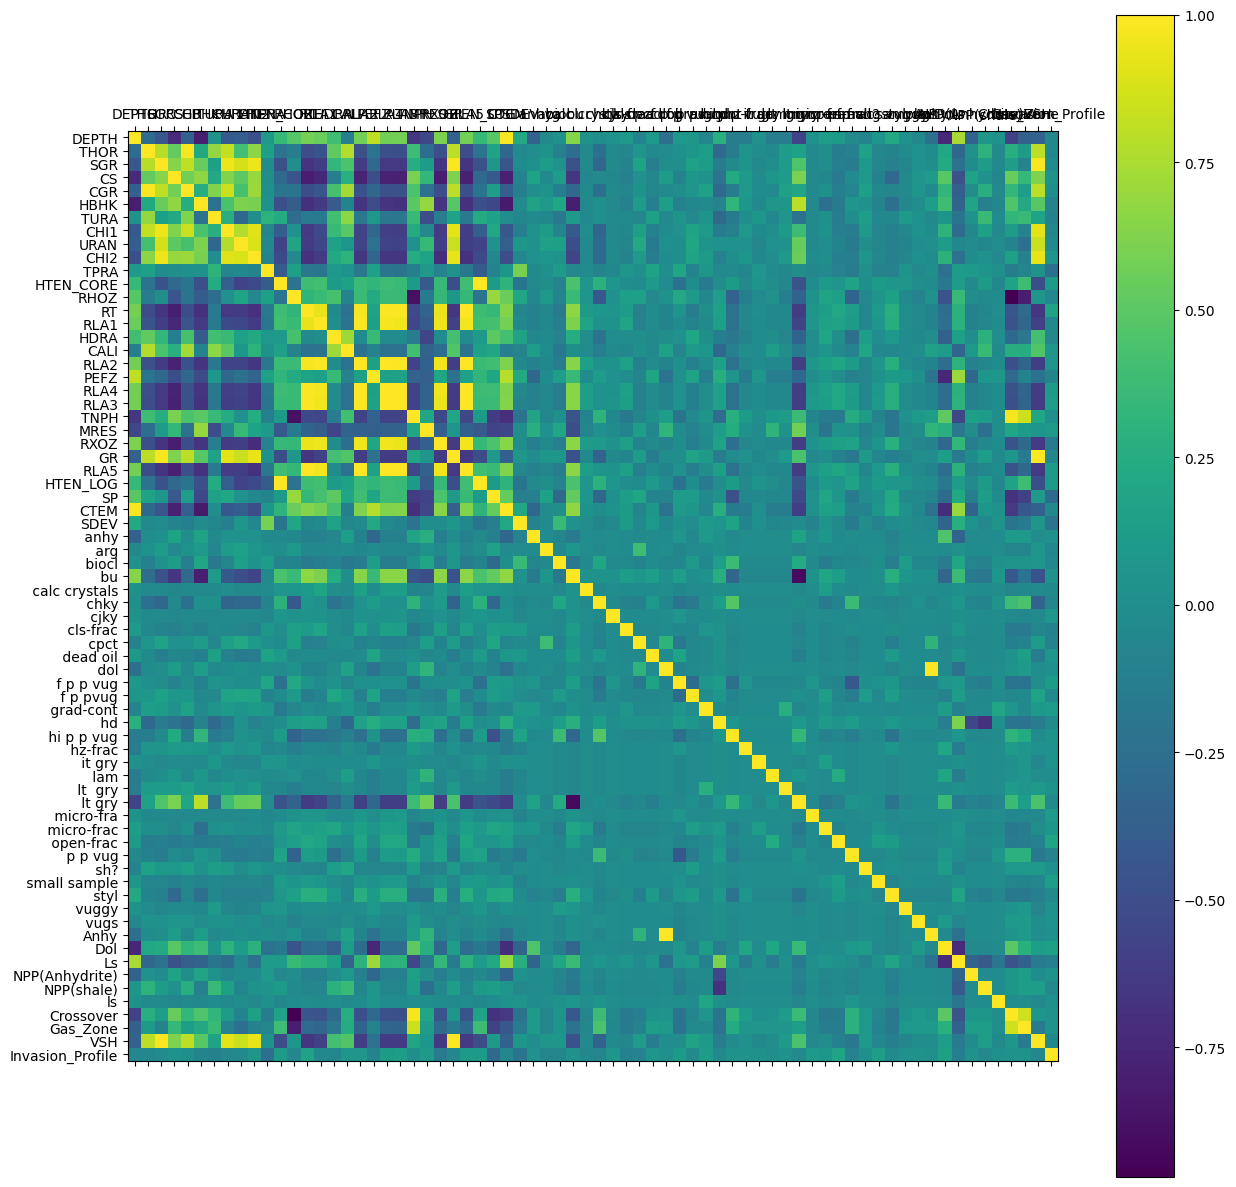

In [410]:

rcParams['figure.figsize'] = 15,15
rcParams['figure.dpi'] = 100
plt.matshow(New_feature.corr())
plt.yticks(np.arange(New_feature.shape[1]),New_feature.columns)
plt.xticks(np.arange(New_feature.shape[1]),New_feature.columns)
plt.colorbar()
plt.show()

# Dimensiona_lityReducer

Original DataFrame Columns: Index(['DEPTH', 'THOR', 'SGR', 'CS', 'CGR', 'HBHK', 'TURA', 'CHI1', 'URAN',
       'CHI2', 'TPRA', 'HTEN_CORE', 'RHOZ', 'RT', 'RLA1', 'HDRA', 'CALI',
       'RLA2', 'PEFZ', 'RLA4', 'RLA3', 'TNPH', 'MRES', 'RXOZ', 'GR', 'RLA5',
       'HTEN_LOG', 'SP', 'CTEM', 'SDEV', ' anhy', ' arg', ' biocl', ' bu',
       ' calc crystals', ' chky', ' cjky', ' cls-frac', ' cpct', ' dead oil',
       ' dol', ' f p p vug', ' f p pvug', ' grad-cont', ' hd', ' hi p p vug',
       ' hz-frac', ' it gry', ' lam', ' lt  gry', ' lt gry', ' micro-fra',
       ' micro-frac', ' open-frac', ' p p vug', ' sh?', ' small sample',
       ' styl', ' vuggy', ' vugs', 'Anhy', 'Dol', 'Ls', 'NPP(Anhydrite)',
       'NPP(shale)', 'ls', 'Crossover', 'VSH', 'Invasion_Profile'],
      dtype='object')
Numeric Columns Only: Index(['DEPTH', 'THOR', 'SGR', 'CS', 'CGR', 'HBHK', 'TURA', 'CHI1', 'URAN',
       'CHI2', 'TPRA', 'HTEN_CORE', 'RHOZ', 'RT', 'RLA1', 'HDRA', 'CALI',
       'RLA2', 'PEFZ', 'RLA4',

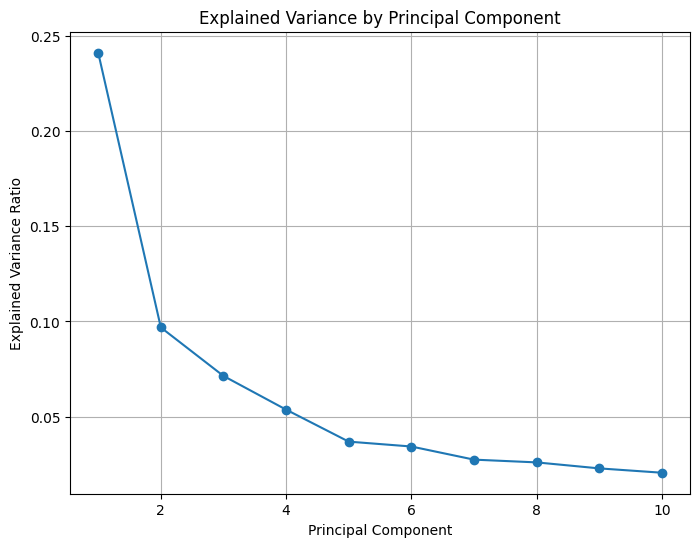

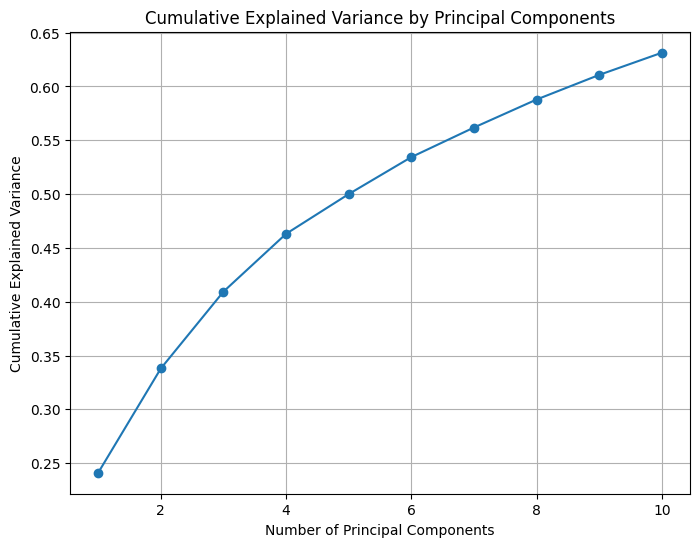

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.832844,-2.051291,0.755203,-2.621948,0.271078,-1.096603,1.476944,1.667208,1.675996,4.143741
1,-5.812728,-4.621628,-0.205900,-5.514775,0.908556,1.062112,0.405654,4.868682,-1.181763,2.177001
2,-5.872393,-4.226921,0.120732,-4.613277,0.962824,-0.866887,2.354834,1.784851,1.045499,2.784138


In [413]:

class DimensionalityReducer:
    def __init__(self, rdf):
        self.rdf = rdf
        self.scaler = StandardScaler()
        self.pca = None

        # Debugging: Print the columns before PCA
        print("Original DataFrame Columns:", self.rdf.columns)
        print("Numeric Columns Only:", self.rdf.select_dtypes(include=["number"]).columns)
    def apply_pca(self, columns=None, n_components=None):
        """
        Apply PCA to reduce dimensionality, handling missing values safely.
        """
        # Select only numeric columns
        if columns is None:
            columns = self.rdf.select_dtypes(include=["number"]).columns

        # Ensure selected columns are numeric
        numeric_rdf = self.rdf[columns]

        # Debugging: Print row count before handling NaNs
        print("Before NaN Handling: Rows =", numeric_rdf.shape[0])

        # 🔹 Fix: Fill NaNs instead of dropping rows
        numeric_rdf = numeric_rdf.fillna(numeric_rdf.median())

        # Debugging: Check row count after filling NaNs
        print("After NaN Handling: Rows =", numeric_rdf.shape[0])

        # Check if data is empty after NaN handling
        if numeric_rdf.empty:
            raise ValueError("PCA cannot be applied: No valid data after NaN handling.")

        # Standardize the data
        standardized_data = self.scaler.fit_transform(numeric_rdf)

        # Apply PCA
        self.pca = PCA(n_components=n_components)
        principal_components = self.pca.fit_transform(standardized_data)

        # Create DataFrame for principal components
        pc_df = pd.DataFrame(
            principal_components,
            columns=[f"PC{i + 1}" for i in range(principal_components.shape[1])],
            index=numeric_rdf.index
        )

        return pc_df

    def explained_variance_plot(self):
        """
        Plot the explained variance ratio to determine the optimal number of components.
        """
        if self.pca is None:
            raise ValueError("PCA has not been applied yet. Run apply_pca() first.")

        plt.figure(figsize=(8, 6))
        plt.plot(
            range(1, len(self.pca.explained_variance_ratio_) + 1),
            self.pca.explained_variance_ratio_,
            marker='o'
        )
        plt.xlabel("Principal Component")
        plt.ylabel("Explained Variance Ratio")
        plt.title("Explained Variance by Principal Component")
        plt.grid(True)
        plt.show()

    def cumulative_variance_plot(self):
        """
        Plot the cumulative explained variance ratio.
        """
        if self.pca is None:
            raise ValueError("PCA has not been applied yet. Run apply_pca() first.")

        cumulative_variance = self.pca.explained_variance_ratio_.cumsum()

        plt.figure(figsize=(8, 6))
        plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
        plt.xlabel("Number of Principal Components")
        plt.ylabel("Cumulative Explained Variance")
        plt.title("Cumulative Explained Variance by Principal Components")
        plt.grid(True)
        plt.show()


# ✅ Load and clean the dataset (Assuming New_feature is your dataset)
New_feature_reduction = New_feature.select_dtypes(include=["number"])  # Keep only numeric columns

# ✅ Instantiate the DimensionalityReducer class
reducer = DimensionalityReducer(New_feature_reduction)

# ✅ Apply PCA using all numeric columns, retaining 3 components
pca_results = reducer.apply_pca(n_components=10)

#pca_results['DEPTH'] = New_feature['DEPTH']


# ✅ Display the transformed principal components
print("Principal Components:")
print(pca_results)

# ✅ Plot the explained variance ratio
reducer.explained_variance_plot()

# ✅ Plot the cumulative explained variance ratio
reducer.cumulative_variance_plot()
pca_results.to_csv("pca_results.csv")

pca_results.head(3)


# Confusion matrix dimensions features


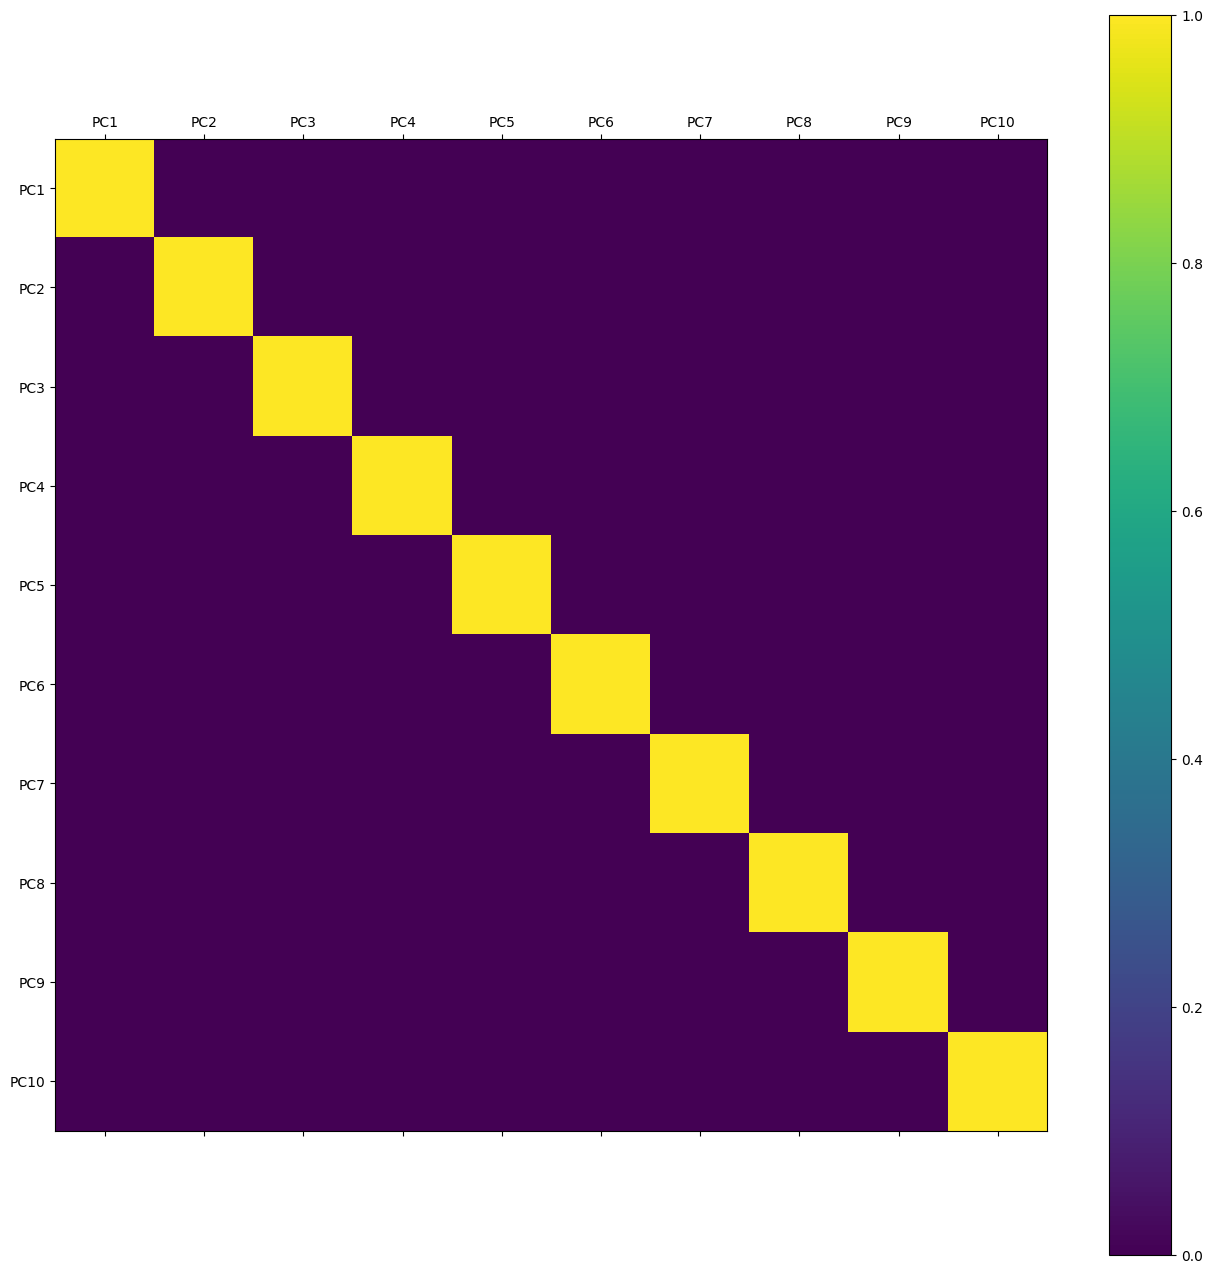

In [414]:
rcParams['figure.figsize'] = 20,20
rcParams['figure.dpi'] = 100
plt.matshow(pca_results.corr())
plt.yticks(np.arange(pca_results.shape[1]),pca_results.columns)
plt.xticks(np.arange(pca_results.shape[1]),pca_results.columns)
plt.colorbar()
plt.show()

# Prepare_test_Data

In [431]:
# Load the datasets
data1 = x_axis.copy()
data2 = y_axis.copy()
#print(x_axis)
#print(y_axis)

# ✅ Merge the datasets on "DEPTH" using an inner join (only matching depths will be kept)
merged_dataset = pd.merge(data1, data2, on="DEPTH", how="inner")
#merged_dataset = merged_dataset.set_index("DEPTH", inplace=True)
# ✅ Display the first few rows
print(merged_dataset.head())

# ✅ Save the merged dataset
merged_dataset.to_csv("merged_dataset.csv")

# Step 2: Extract features (X) and labels (y)
x = data1
y = data2
# Example: Dropping rows with missing values in X
X_clean = x.dropna()
y_clean = y.loc[X_clean.index]  # Align y with cleaned X

X = x.reset_index(drop=True)
y = y.reset_index(drop=True)

print(merged_dataset)
print("Shape of merged_dataset:", merged_dataset.shape)
print("Shape of X:", x.shape)
print("Shape of y:", y.shape)
x.to_csv("x.csv")
y.to_csv("y.csv")

# ✅ Split data into training and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# ✅ Display dataset shapes
print("Training Set:", x_train.shape, y_train.shape)
print("Validation Set:", x_val.shape, y_val.shape)
print("Test Set:", x_test.shape, y_test.shape)

# ✅ Print class distribution in training data
unique, counts = np.unique(y_train, return_counts=True)
#print("Class Distribution in Training Data:", dict(zip(unique, counts)))


     DEPTH      THOR       SGR        CS       CGR      HBHK      TURA  \
0  1924.07       NaN       NaN       NaN       NaN       NaN       NaN   
1  1924.20 -0.502633  0.181472  1.377335 -0.488169  1.409743 -0.966878   
2  1924.42 -0.422618  0.146187  1.363698 -0.430868  1.409743 -0.826787   
3  1924.73 -0.342603  0.110902  1.350060 -0.373567  1.409743 -0.686695   
4  1925.04 -0.262588  0.075617  1.336423 -0.316266  1.409743 -0.546603   

       CHI1      URAN      CHI2  ...   small sample   styl   vuggy   vugs  \
0       NaN       NaN       NaN  ...              0      0       0      0   
1  0.165225  0.534914 -0.143832  ...              0      0       0      0   
2  0.094074  0.453406 -0.147743  ...              0      0       0      0   
3  0.022922  0.371897 -0.151654  ...              0      0       0      0   
4 -0.048230  0.290389 -0.155565  ...              0      0       0      0   

   Anhy  Dol  Ls  NPP(Anhydrite)  NPP(shale)  ls  
0     0    1   0               0         

# confusion

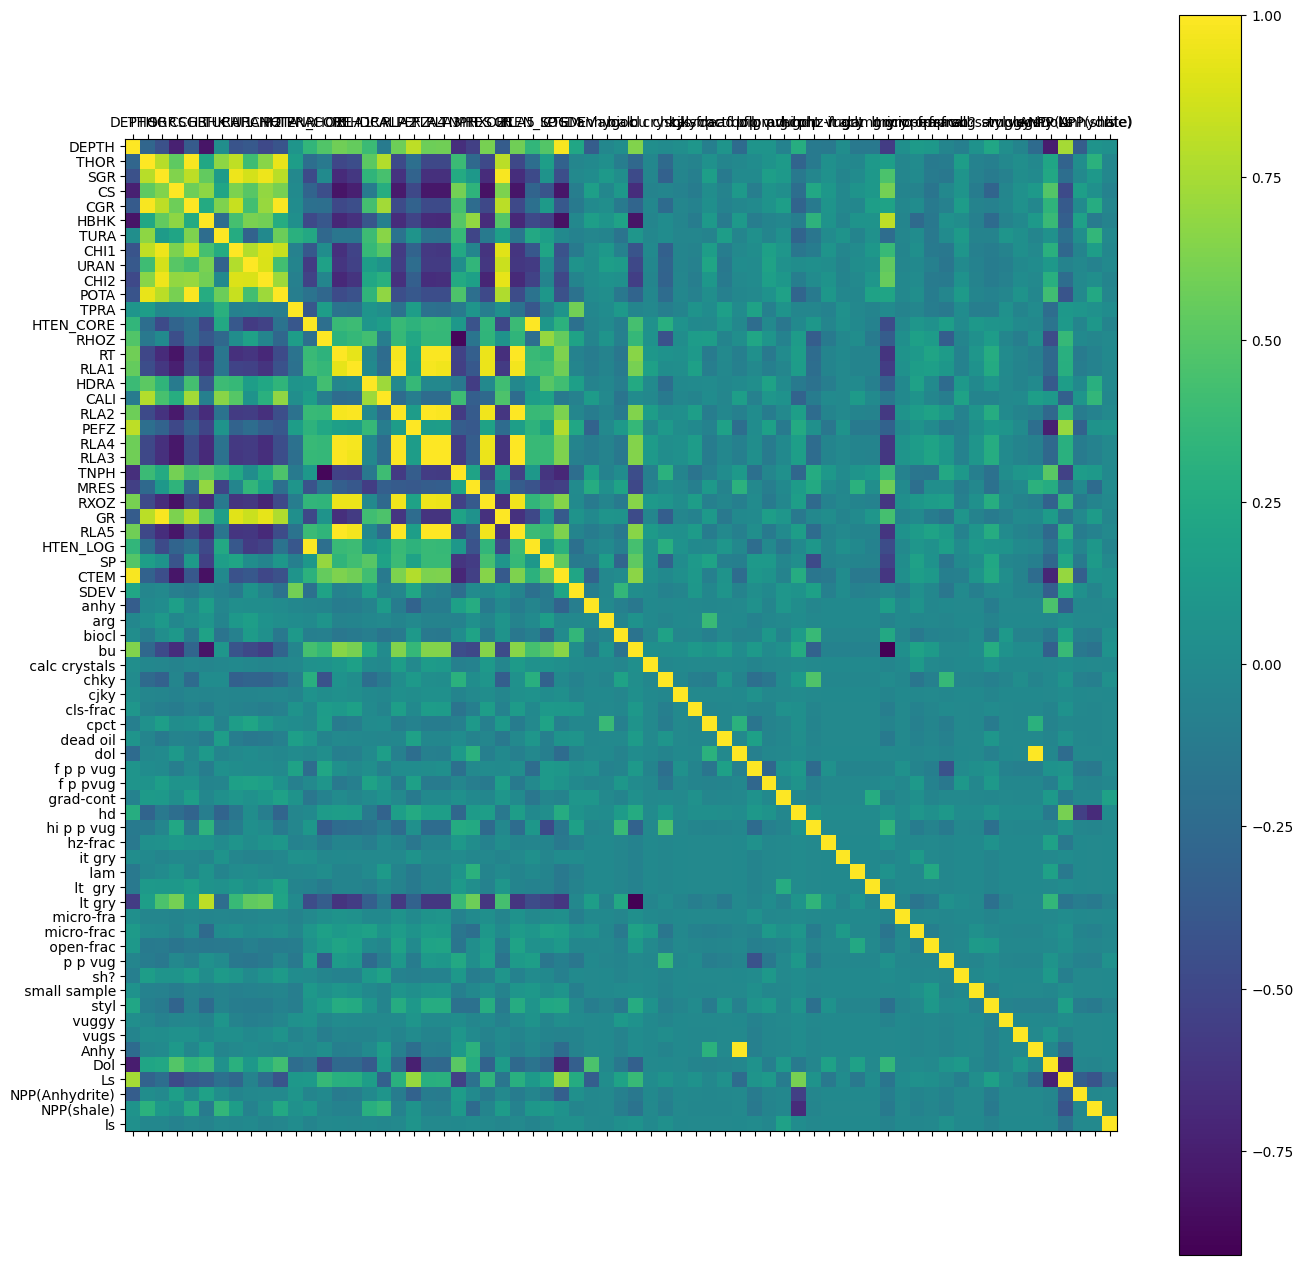

In [432]:
rcParams['figure.figsize'] = 20,20
rcParams['figure.dpi'] = 100
plt.matshow(merged_dataset.corr())
plt.yticks(np.arange(merged_dataset.shape[1]),merged_dataset.columns)
plt.xticks(np.arange(merged_dataset.shape[1]),merged_dataset.columns)
plt.colorbar()
plt.show()

# DecisionTreeClassifier

In [433]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Ensure y is 1D and contains discrete labels
print("Unique classes in y:", np.unique(y_train))

# Define classifier hyperparameters
Hyper_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]
}

# Grid search for classification
Tree_Gridsearch_paramters = GridSearchCV(
    DecisionTreeClassifier(),
    Hyper_parameters,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=1
)

Tree_crossvalidation = Tree_Gridsearch_paramters.fit(x_train, y_train)
print("Best parameters:", Tree_crossvalidation.best_params_)

Unique classes in y: [0.00000e+00 1.00000e+00 1.92420e+03 1.92442e+03 1.92504e+03 1.92544e+03
 1.92611e+03 1.92673e+03 1.92710e+03 1.92739e+03 1.92775e+03 1.92806e+03
 1.92905e+03 1.92912e+03 1.92938e+03 1.92978e+03 1.93010e+03 1.93105e+03
 1.93111e+03 1.93138e+03 1.93172e+03 1.93210e+03 1.93238e+03 1.93304e+03
 1.93312e+03 1.93335e+03 2.59874e+03 2.59881e+03 2.59942e+03 2.59974e+03
 2.60010e+03 2.60042e+03 2.60108e+03 2.60144e+03 2.60174e+03 2.60178e+03
 2.60208e+03 2.60242e+03 2.60275e+03 2.60281e+03 2.60381e+03 2.60409e+03
 2.60474e+03 2.60481e+03 2.60550e+03 2.60589e+03 2.60611e+03 2.60640e+03
 2.60694e+03 2.60703e+03 2.60717e+03 2.60781e+03 2.60908e+03 2.60942e+03
 2.60974e+03 2.61008e+03 2.61074e+03 2.61081e+03 2.61108e+03 2.61141e+03
 2.61174e+03 2.61208e+03 2.61241e+03 2.61310e+03 2.61344e+03 2.61374e+03
 2.61381e+03 2.61423e+03 2.61462e+03 2.61480e+03 2.61508e+03 2.61540e+03
 2.61574e+03 2.61581e+03 2.61618e+03 2.61708e+03 2.61742e+03 2.61808e+03
 2.61841e+03 2.61874e+03 2.618

ValueError: 
All the 160 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\tree\_classes.py", line 1024, in fit
    super()._fit(
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\tree\_classes.py", line 294, in _fit
    check_classification_targets(y)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\multiclass.py", line 222, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous-multioutput. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [434]:
Names=list(x_train.columns.values)
for f in range(x_train.shape[1]):
    print((Names[f], importances[f]))

('DEPTH', np.float64(0.0))
('THOR', np.float64(0.0))
('SGR', np.float64(0.0))
('CS', np.float64(0.0))
('CGR', np.float64(0.0))
('HBHK', np.float64(0.0))
('TURA', np.float64(0.0))
('CHI1', np.float64(0.0))
('URAN', np.float64(0.0))
('CHI2', np.float64(0.0))
('POTA', np.float64(0.0))
('TPRA', np.float64(0.0))
('HTEN_CORE', np.float64(0.0))
('RHOZ', np.float64(0.0))
('RT', np.float64(0.0))
('RLA1', np.float64(0.0))
('HDRA', np.float64(0.0))
('CALI', np.float64(0.0))
('RLA2', np.float64(0.0))
('PEFZ', np.float64(0.0))
('RLA4', np.float64(0.0))
('RLA3', np.float64(0.0))
('TNPH', np.float64(0.0))
('MRES', np.float64(0.0))
('RXOZ', np.float64(0.0))
('GR', np.float64(0.0))
('RLA5', np.float64(0.0))
('HTEN_LOG', np.float64(0.0))
('SP', np.float64(0.0))
('CTEM', np.float64(0.0))
('SDEV', np.float64(0.0))


In [436]:
unique_facies = np.sort(merged_data_Facies_coding["Facies_Code"].unique())
# Convert the codes to strings for descriptive target names
facies_labels = [str(code) for code in unique_facies]


# Make predictions on the test set
y_pred = Final_Model.predict(x_test)

# Compute Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred, labels=unique_facies)  # Ensure labels match
print("Confusion Matrix:\n", cm1)

# Generate classification report with correct labels
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=facies_labels, labels=unique_facies, zero_division=0))

# Compute Metrics
total1 = cm1.sum()  # Total number of samples
accuracy1 = cm1.diagonal().sum() / total1  # Corrected Accuracy Calculation
print('Accuracy:', accuracy1)

# Compute Sensitivity & Specificity for **first two facies** (adjust if needed)
if cm1.shape[0] > 1:  # Ensure we have at least 2 classes
    sensitivity1 = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1]) if (cm1[0, 0] + cm1[0, 1]) > 0 else 0
    specificity1 = cm1[1, 1] / (cm1[1, 1] + cm1[1, 0]) if (cm1[1, 1] + cm1[1, 0]) > 0 else 0
    print('Sensitivity:', sensitivity1)
    print('Specificity:', specificity1)
else:
    print("Sensitivity and specificity cannot be calculated with only one class.")

KeyError: 'Facies_Code'

# Random_Forest

In [438]:
# 🔹 Choose a Model (Just Change This Line)
model = RandomForestClassifier()  # Change to any model

# 🔹 Define Hyperparameter Grid (Update According to Model)
param_grid = {
    "RandomForestClassifier": {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "DecisionTreeClassifier": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "SVC": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
    },
    "KNeighborsClassifier": {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    },
    "LogisticRegression": {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 200],
    },
    "GradientBoostingClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
    },
    "XGBClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
        'subsample': [0.5, 0.7, 1.0],
    },
    "MLPClassifier": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001],
        'max_iter': [200, 500],
    },
    "GaussianNB": {
        'var_smoothing': [1e-9, 1e-8, 1e-7],
    },
    "LGBMClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [10, 20, 30],
        'max_depth': [3, 5, 10],
    },
}

# 🔹 Perform Grid Search
grid_search = GridSearchCV(model, param_grid[model.__class__.__name__], scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# 🔹 Display Results
print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

# 🔹 Evaluate on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred, zero_division=1))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


ValueError: 
All the 1080 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\ensemble\_forest.py", line 419, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\ensemble\_forest.py", line 831, in _validate_y_class_weight
    check_classification_targets(y)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\multiclass.py", line 222, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous-multioutput. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [245]:
""""
# Initialize a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of each tree
    'min_samples_split': [2, 5, 10, 20],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4, 6]  # Minimum samples per leaf
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(scoring='accuracy',estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
"""

'"\n# Initialize a Random Forest classifier\nrf = RandomForestClassifier(random_state=42)\n\n# Define hyperparameters for tuning\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],  # Number of trees\n    \'max_depth\': [None, 10, 20, 30],  # Depth of each tree\n    \'min_samples_split\': [2, 5, 10, 20],  # Minimum samples to split a node\n    \'min_samples_leaf\': [1, 2, 4, 6]  # Minimum samples per leaf\n}\n\n# Perform Grid Search Cross Validation\ngrid_search = GridSearchCV(scoring=\'accuracy\',estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)\ngrid_search.fit(x_train, y_train)\n\n# Best parameters found\nprint("Best Parameters:", grid_search.best_params_)\n\n# Train the best model\nbest_rf = grid_search.best_estimator_\n\n# Make predictions\ny_pred = best_rf.predict(x_test)\n\n# Evaluate the model\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Test Accuracy: {accuracy:.4f}")\nprint("Classification Report:\n", classification_report(y_test, y_pred, zero_divisio

# XGBoost model

In [246]:
""""
# 🔹 Choose a Model (Just Change This Line)
model = XGBClassifier()  # Change to any model

# 🔹 Define Hyperparameter Grid (Update According to Model)
param_grid = {
    "RandomForestClassifier": {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "DecisionTreeClassifier": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "SVC": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
    },
    "KNeighborsClassifier": {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    },
    "LogisticRegression": {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 200],
    },
    "GradientBoostingClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
    },
    "XGBClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
        'subsample': [0.5, 0.7, 1.0],
    },
    "MLPClassifier": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001],
        'max_iter': [200, 500],
    },
    "GaussianNB": {
        'var_smoothing': [1e-9, 1e-8, 1e-7],
    },
    "LGBMClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [10, 20, 30],
        'max_depth': [3, 5, 10],
    },
}

# 🔹 Perform Grid Search
grid_search = GridSearchCV(model, param_grid[model.__class__.__name__], scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# 🔹 Display Results
print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

# 🔹 Evaluate on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred, zero_division=1))
"""

'"\n# 🔹 Choose a Model (Just Change This Line)\nmodel = XGBClassifier()  # Change to any model\n\n# 🔹 Define Hyperparameter Grid (Update According to Model)\nparam_grid = {\n    "RandomForestClassifier": {\n        \'n_estimators\': [50, 100, 200],\n        \'criterion\': [\'gini\', \'entropy\'],\n        \'max_depth\': [None, 10, 20, 30],\n        \'min_samples_split\': [2, 5, 10],\n        \'min_samples_leaf\': [1, 2, 5],\n    },\n    "DecisionTreeClassifier": {\n        \'criterion\': [\'gini\', \'entropy\'],\n        \'max_depth\': [None, 5, 10, 20],\n        \'min_samples_split\': [2, 5, 10],\n        \'min_samples_leaf\': [1, 2, 5],\n    },\n    "SVC": {\n        \'C\': [0.1, 1, 10],\n        \'kernel\': [\'linear\', \'poly\', \'rbf\', \'sigmoid\'],\n        \'gamma\': [\'scale\', \'auto\'],\n    },\n    "KNeighborsClassifier": {\n        \'n_neighbors\': [3, 5, 7, 10],\n        \'weights\': [\'uniform\', \'distance\'],\n        \'algorithm\': [\'auto\', \'ball_tree\', \'kd_tree\

In [440]:

# Suppress FutureWarnings from scikit-learn
warnings.filterwarnings("ignore", category=FutureWarning)

# ---------------
# 1. Label Encoding
# ---------------
# We fit the label encoder on the training labels only.
# (If you try to encode labels unseen during training, an error will occur.)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)  # y_train should be defined; e.g., a 1D array-like of labels

# Transform the training labels
y_train_encoded = label_encoder.transform(y_train)

# Before encoding the validation labels, filter out any samples with labels not seen in training.
# (If you prefer not to filter out these samples, you must re-split your data so that training covers all classes.)
mask = np.isin(y_val, label_encoder.classes_)
if not np.all(mask):
    print("Warning: Some validation samples have labels not seen during training and will be ignored.")
x_val_filtered = x_val[mask]
y_val_filtered = y_val[mask]
y_val_encoded = label_encoder.transform(y_val_filtered)
# Now, both y_train_encoded and y_val_encoded contain only classes from the training set.

# ---------------
# 2. Handle Class Imbalance with RandomOverSampler
# ---------------
oversampler = RandomOverSampler(random_state=42)
x_train_balanced, y_train_balanced = oversampler.fit_resample(x_train, y_train_encoded)

# ---------------
# 3. Train and Validate a Random Forest Classifier
# ---------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_balanced, y_train_balanced)

# Validate on the filtered validation set
y_val_pred_rf = rf_model.predict(x_val_filtered)
print("Random Forest Validation Accuracy:", accuracy_score(y_val_encoded, y_val_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_val_encoded, y_val_pred_rf, zero_division=1))

# ---------------
# 4. (Optional) Convert Data to NumPy Arrays if Necessary
# ---------------
# (This ensures that all inputs to XGBoost are NumPy arrays.)
if hasattr(x_train_balanced, "to_numpy"):
    x_train_balanced = x_train_balanced.to_numpy()
if hasattr(x_val_filtered, "to_numpy"):
    x_val_filtered = x_val_filtered.to_numpy()
if hasattr(y_train_balanced, "to_numpy"):
    y_train_balanced = y_train_balanced.to_numpy()
if hasattr(y_val_encoded, "to_numpy"):
    y_val_encoded = y_val_encoded.to_numpy()

# ---------------
# 5. Train and Validate an XGBoost Classifier with Early Stopping
# ---------------
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    eval_metric="mlogloss",
    random_state=42,
    early_stopping_rounds=10,  # Early stopping rounds
)

xgb_model.fit(
    x_train_balanced, y_train_balanced,
    eval_set=[(x_val_filtered, y_val_encoded)],
    verbose=True  # Print progress during training
)

y_val_pred_xgb = xgb_model.predict(x_val_filtered)
print("XGBoost Validation Accuracy:", accuracy_score(y_val_encoded, y_val_pred_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_val_encoded, y_val_pred_xgb, zero_division=1))

ValueError: y should be a 1d array, got an array of shape (263, 37) instead.

# Support Vector Machine

In [441]:
# 🔹 Choose a Model (Just Change This Line)
model = SVC()  # Change to any model

# 🔹 Define Hyperparameter Grid (Update According to Model)
param_grid = {
    "RandomForestClassifier": {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "DecisionTreeClassifier": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "SVC": {
        'C': [10],
        'kernel': ['poly'],
        'gamma': ['auto'],
    },
    "KNeighborsClassifier": {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    },
    "LogisticRegression": {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 200],
    },
    "GradientBoostingClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
    },
    "XGBClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
        'subsample': [0.5, 0.7, 1.0],
    },
    "MLPClassifier": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001],
        'max_iter': [200, 500],
    },
    "GaussianNB": {
        'var_smoothing': [1e-9, 1e-8, 1e-7],
    },
    "LGBMClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [10, 20, 30],
        'max_depth': [3, 5, 10],
    },
}

# 🔹 Perform Grid Search
grid_search = GridSearchCV(model, param_grid[model.__class__.__name__], scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# 🔹 Display Results
print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

# 🔹 Evaluate on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred, zero_division=1))


Fitting 5 folds for each of 1 candidates, totalling 5 fits


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\svm\_base.py", line 197, in fit
    X, y = validate_data(
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\validation.py", line 1387, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\validation.py", line 1408, in _check_y
    y = column_or_1d(y, warn=True)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\validation.py", line 1485, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (210, 37) instead.

--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\svm\_base.py", line 197, in fit
    X, y = validate_data(
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\validation.py", line 1387, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\validation.py", line 1408, in _check_y
    y = column_or_1d(y, warn=True)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\validation.py", line 1485, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (211, 37) instead.


# KNN (k-Nearest Neighbors)

In [443]:
# 🔹 Choose a Model (Just Change This Line)
model = KNeighborsClassifier()  # Change to any model

# 🔹 Define Hyperparameter Grid (Update According to Model)
param_grid = {
    "RandomForestClassifier": {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "DecisionTreeClassifier": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "SVC": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
    },
    "KNeighborsClassifier": {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    },
    "LogisticRegression": {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 200],
    },
    "GradientBoostingClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
    },
    "XGBClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
        'subsample': [0.5, 0.7, 1.0],
    },
    "MLPClassifier": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001],
        'max_iter': [200, 500],
    },
    "GaussianNB": {
        'var_smoothing': [1e-9, 1e-8, 1e-7],
    },
    "LGBMClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [10, 20, 30],
        'max_depth': [3, 5, 10],
    },
}

# 🔹 Perform Grid Search
grid_search = GridSearchCV(model, param_grid[model.__class__.__name__], scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# 🔹 Display Results
print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

# 🔹 Evaluate on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred, zero_division=1))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


ValueError: 
All the 160 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\neighbors\_classification.py", line 239, in fit
    return self._fit(X, y)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\neighbors\_base.py", line 508, in _fit
    check_classification_targets(y)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\multiclass.py", line 222, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous-multioutput. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


# Logistic Regression

In [114]:
# 🔹 Choose a Model (Just Change This Line)
model = LogisticRegression()  # Change to any model

# 🔹 Define Hyperparameter Grid (Update According to Model)
param_grid = {
    "RandomForestClassifier": {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "DecisionTreeClassifier": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "SVC": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
    },
    "KNeighborsClassifier": {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    },
    "LogisticRegression": {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 200],
    },
    "GradientBoostingClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
    },
    "XGBClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
        'subsample': [0.5, 0.7, 1.0],
    },
    "MLPClassifier": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001],
        'max_iter': [200, 500],
    },
    "GaussianNB": {
        'var_smoothing': [1e-9, 1e-8, 1e-7],
    },
    "LGBMClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [10, 20, 30],
        'max_depth': [3, 5, 10],
    },
}

# 🔹 Perform Grid Search
grid_search = GridSearchCV(model, param_grid[model.__class__.__name__], scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# 🔹 Display Results
print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

# 🔹 Evaluate on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred, zero_division=1))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


ValueError: 
All the 480 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\linear_model\_logistic.py", line 63, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.

--------------------------------------------------------------------------------
168 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\linear_model\_logistic.py", line 1222, in fit
    X, y = validate_data(
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\validation.py", line 1387, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\validation.py", line 1408, in _check_y
    y = column_or_1d(y, warn=True)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\validation.py", line 1485, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (210, 71) instead.

--------------------------------------------------------------------------------
112 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\linear_model\_logistic.py", line 1222, in fit
    X, y = validate_data(
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\validation.py", line 1387, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\validation.py", line 1408, in _check_y
    y = column_or_1d(y, warn=True)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\validation.py", line 1485, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (211, 71) instead.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\linear_model\_logistic.py", line 63, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or None penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\linear_model\_logistic.py", line 71, in _check_solver
    raise ValueError(
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\linear_model\_logistic.py", line 1203, in fit
    raise ValueError("l1_ratio must be specified when penalty is elasticnet.")
ValueError: l1_ratio must be specified when penalty is elasticnet.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\linear_model\_logistic.py", line 76, in _check_solver
    raise ValueError("penalty=None is not supported for the liblinear solver")
ValueError: penalty=None is not supported for the liblinear solver


# Gradient Boosting

In [ ]:
# 🔹 Choose a Model (Just Change This Line)
model = GradientBoostingClassifier()  # Change to any model

# 🔹 Define Hyperparameter Grid (Update According to Model)
param_grid = {
    "RandomForestClassifier": {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "DecisionTreeClassifier": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "SVC": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
    },
    "KNeighborsClassifier": {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    },
    "LogisticRegression": {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 200],
    },
    "GradientBoostingClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
    },
    "XGBClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
        'subsample': [0.5, 0.7, 1.0],
    },
    "MLPClassifier": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001],
        'max_iter': [200, 500],
    },
    "GaussianNB": {
        'var_smoothing': [1e-9, 1e-8, 1e-7],
    },
    "LGBMClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [10, 20, 30],
        'max_depth': [3, 5, 10],
    },
}

# 🔹 Perform Grid Search
grid_search = GridSearchCV(model, param_grid[model.__class__.__name__], scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# 🔹 Display Results
print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

# 🔹 Evaluate on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred, zero_division=1))

# Neural Network (MLP)

In [ ]:
# 🔹 Choose a Model (Just Change This Line)
model = MLPClassifier()  # Change to any model

# 🔹 Define Hyperparameter Grid (Update According to Model)
param_grid = {
    "RandomForestClassifier": {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "DecisionTreeClassifier": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "SVC": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
    },
    "KNeighborsClassifier": {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    },
    "LogisticRegression": {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 200],
    },
    "GradientBoostingClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
    },
    "XGBClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
        'subsample': [0.5, 0.7, 1.0],
    },
    "MLPClassifier": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001],
        'max_iter': [200, 500],
    },
    "GaussianNB": {
        'var_smoothing': [1e-9, 1e-8, 1e-7],
    },
    "LGBMClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [10, 20, 30],
        'max_depth': [3, 5, 10],
    },
}

# 🔹 Perform Grid Search
grid_search = GridSearchCV(model, param_grid[model.__class__.__name__], scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# 🔹 Display Results
print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

# 🔹 Evaluate on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred, zero_division=1))

# Naïve Bayes

In [ ]:
# 🔹 Choose a Model (Just Change This Line)
model = GaussianNB()  # Change to any model

# 🔹 Define Hyperparameter Grid (Update According to Model)
param_grid = {
    "RandomForestClassifier": {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "DecisionTreeClassifier": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "SVC": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
    },
    "KNeighborsClassifier": {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    },
    "LogisticRegression": {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 200],
    },
    "GradientBoostingClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
    },
    "XGBClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
        'subsample': [0.5, 0.7, 1.0],
    },
    "MLPClassifier": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001],
        'max_iter': [200, 500],
    },
    "GaussianNB": {
        'var_smoothing': [1e-9, 1e-8, 1e-7],
    },
    "LGBMClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [10, 20, 30],
        'max_depth': [3, 5, 10],
    },
}

# 🔹 Perform Grid Search
grid_search = GridSearchCV(model, param_grid[model.__class__.__name__], scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# 🔹 Display Results
print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

# 🔹 Evaluate on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred, zero_division=1))

# LightGBM

In [447]:
# 🔹 Choose a Model (Just Change This Line)
model = LGBMClassifier()  # Change to any model

# 🔹 Define Hyperparameter Grid (Update According to Model)
param_grid = {
    "RandomForestClassifier": {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "DecisionTreeClassifier": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    "SVC": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
    },
    "KNeighborsClassifier": {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    },
    "LogisticRegression": {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 200],
    },
    "GradientBoostingClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
    },
    "XGBClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
        'subsample': [0.5, 0.7, 1.0],
    },
    "MLPClassifier": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001],
        'max_iter': [200, 500],
    },
    "GaussianNB": {
        'var_smoothing': [1e-9, 1e-8, 1e-7],
    },
    "LGBMClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [10, 20, 30],
        'max_depth': [3, 5, 10],
    },
}

# 🔹 Perform Grid Search
grid_search = GridSearchCV(model, param_grid[model.__class__.__name__], scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# 🔹 Display Results
print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

# 🔹 Evaluate on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred, zero_division=1))

Fitting 5 folds for each of 81 candidates, totalling 405 fits


ValueError: 
All the 405 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\lightgbm\sklearn.py", line 1237, in fit
    _LGBMCheckClassificationTargets(y)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\multiclass.py", line 222, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous-multioutput. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


# multi

In [444]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# 🔹 Wrap the Classifier for Multi-Output Support
base_model = RandomForestClassifier()
model = MultiOutputClassifier(base_model)  # Wrap inside MultiOutputClassifier

# 🔹 Define Hyperparameter Grid
param_grid = {
    'estimator__n_estimators': [50, 100, 200],  # Use 'estimator__' prefix for wrapped models
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 5],
}

# 🔹 Perform Grid Search with Multi-Output
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)  # ✅ Works for multi-output classification

# 🔹 Display Best Parameters and Accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

# 🔹 Evaluate on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# 🔹 Print Classification Report for Multi-Output
for i, col in enumerate(y_train.columns):
    print(f"🔹 Classification Report for {col}:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i], zero_division=1))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


ValueError: 
All the 1080 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\multioutput.py", line 543, in fit
    super().fit(X, Y, sample_weight=sample_weight, **fit_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\multioutput.py", line 245, in fit
    check_classification_targets(y)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\multiclass.py", line 222, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous-multioutput. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


# multi model

In [446]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.multioutput import MultiOutputClassifier

# 🔹 Load & Split Data

# 🔹 Define Model Choices
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "SVC": SVC(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(),
    "MLPClassifier": MLPClassifier(),
    "GaussianNB": GaussianNB(),
    "LGBMClassifier": LGBMClassifier(),
}

# 🔹 Define Hyperparameter Grid
param_grid = {
    "RandomForestClassifier": {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
    },
    "DecisionTreeClassifier": {
        'max_depth': [None, 5, 10],
    },
    "SVC": {
        'C': [0.1, 1],
        'kernel': ['linear', 'rbf'],
    },
    "KNeighborsClassifier": {
        'n_neighbors': [3, 5],
    },
    "LogisticRegression": {
        'C': [0.1, 1, 10],
        'solver': ['liblinear'],
    },
    "GradientBoostingClassifier": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
    },
    "XGBClassifier": {
        'n_estimators': [50, 100],
        'max_depth': [3, 5],
    },
    "MLPClassifier": {
        'hidden_layer_sizes': [(50,), (100,)],
        'activation': ['relu', 'tanh'],
    },
    "GaussianNB": {
        'var_smoothing': [1e-9, 1e-8],
    },
    "LGBMClassifier": {
        'n_estimators': [50, 100],
        'num_leaves': [10, 20],
    },
}

# 🔹 Run GridSearch for Each Model
for model_name, model in models.items():
    print(f"\n🔹 Training {model_name}...\n")

    # ⚠️ Wrap Non-Multi-Output Models with MultiOutputClassifier
    if y_train.ndim > 1 and y_train.shape[1] > 1:  # Multi-output case
        if not hasattr(model, "fit"):  # If it's not a multi-output model
            model = MultiOutputClassifier(model)

    # Get Model Params
    model_params = param_grid.get(model_name, {})

    # Run GridSearchCV
    grid_search = GridSearchCV(model, model_params, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(x_train, y_train)

    # Print Best Params & Score
    print(f"✅ Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"🎯 Best Accuracy: {grid_search.best_score_:.4f}")

    # Evaluate on Test Set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)

    print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))



🔹 Training RandomForestClassifier...

Fitting 3 folds for each of 6 candidates, totalling 18 fits


ValueError: 
All the 18 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\ensemble\_forest.py", line 419, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\ensemble\_forest.py", line 831, in _validate_y_class_weight
    check_classification_targets(y)
  File "D:\New folder (4)\.venv1\lib\site-packages\sklearn\utils\multiclass.py", line 222, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous-multioutput. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.
